In [2]:
!ls

0_CreateMarketingData_SDXDemo.ipynb  data
1_Data_Access.ipynb		     images
2_Productionize_Classifier.ipynb     README.md
Atlas_Client_Example.ipynb	     requirements.txt


### Marketing Campaign Info Dataset

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [4]:
camp_conversion_df = pd.read_csv('data/campaign_conversion.csv')

In [5]:
rg = 1000

In [6]:
camp_conversion_df = camp_conversion_df.iloc[:rg]

In [7]:
mu, sigma = 1, .4 # mean and standard deviation
s = np.random.normal(mu, sigma, rg)

In [8]:
camp_conversion_df['score'] = camp_conversion_df['conversion']+s

In [9]:
camp_conversion_df['score'].sum()

1119.7762862762588

<AxesSubplot:>

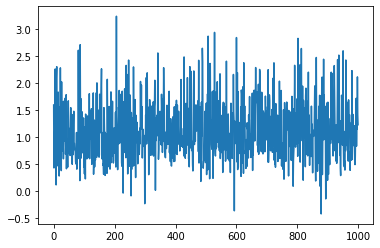

In [10]:
camp_conversion_df['score'].plot()

In [11]:
r = np.corrcoef(camp_conversion_df['score'], camp_conversion_df['conversion'])
#checking corr with new feature
r

array([[1.        , 0.65058813],
       [0.65058813, 1.        ]])

In [12]:
!pip3 install faker

In [13]:
from faker import Faker

In [14]:
fake = Faker('en_US')

In [15]:
final = {} 
final['name'] = [fake.name() for i in range(rg)]
final['street_address'] = [fake.street_address() for i in range(rg)]
final['city'] = [fake.city() for i in range(rg)]
final['postcode'] = [fake.postcode() for i in range(rg)]
final['phone_number'] = [fake.phone_number() for i in range(rg)]
final['job'] = [fake.job() for i in range(rg)]

In [16]:
personal_data = pd.DataFrame(final)

In [17]:
marketing_data = pd.concat([personal_data, camp_conversion_df], axis=1)

### Banking Info Dataset

In [18]:
import random
final = {}
rg = 500
final['name'] = marketing_data['name'].sample(n=rg, replace=False)
final['ABA_routing'] = [fake.aba() for i in range(rg)]
final['bank_country'] = [fake.bank_country() for i in range(rg)]
final['account_number'] = [fake.bban() for i in range(rg)]
final['IBAN'] = [fake.iban() for i in range(rg)]
final['swift11'] = [fake.swift11() for i in range(rg)]
final['random'] = [random.randint(0, 1) for i in range(rg)]

In [19]:
bank_data = pd.DataFrame(final)

In [20]:
bank_data.loc[bank_data['random'] == 1, 'name'] = fake.name()

In [21]:
bank_data = bank_data.drop('random', axis=1)

In [22]:
bank_data = bank_data.drop_duplicates(subset=['name'])

In [23]:
marketing_data.drop_duplicates(subset=['name']).shape

(993, 16)

In [33]:
bank_data = pd.merge(bank_data, marketing_data, how="inner", on="name")

In [36]:
bank_data = bank_data.drop(columns=["street_address", "city", "postcode", "phone_number", "job"])

In [43]:
bank_data

,name,ABA_routing,bank_country,account_number,IBAN,swift11,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion,score
0,Mackenzie Vaughan,083580013,GB,EBXA05200807855178,GB84GXZR39940007709339,YXHUGBDKUS2,7,185.73,1,0,Surburban,0,Phone,Discount,0,0.308075
1,Rachel Crawford,114883362,GB,XCVH19896845146988,GB06CTSK10967517914977,WXLHGBFSI6R,11,131.76,0,1,Surburban,1,Web,Buy One Get One,1,2.003466
2,David Reed,059020840,GB,GNRO68059835609422,GB50UYLY25868018431858,LYCPGBSEO9H,8,286.25,0,1,Urban,1,Multichannel,Buy One Get One,0,0.564446
3,John Hayes,079448091,GB,BIMT12135175033722,GB04YYLG55326550570354,DUMDGBTTD0D,2,576.02,0,1,Surburban,1,Web,Buy One Get One,0,0.798547
4,Tina Townsend,101899534,GB,FUKH58972855248778,GB33HKWN97826760641847,RQNDGBP2S1U,11,133.15,1,0,Urban,1,Phone,Discount,0,0.486097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,Jeffrey Snyder,086725833,GB,XWAN19007984103823,GB71YLBZ47530980566516,EHTHGBN4FC6,12,75.26,1,0,Urban,1,Phone,Buy One Get One,0,1.193080
255,Nicole Hinton,099192107,GB,OHNU69578713939284,GB21FDUG95227151696823,DHBAGB748ND,11,236.97,1,1,Urban,1,Phone,Discount,0,0.862572
256,Patrick Jones,123945165,GB,LJYD80630790908240,GB33UNER21728627782820,NITJGB0VM2F,2,269.13,0,1,Surburban,0,Multichannel,Buy One Get One,0,0.914335
257,Scott Hall,052455522,GB,SDII29728167987572,GB95BEPV79430694008638,LORYGBC7B9E,10,29.99,1,0,Surburban,1,Web,No Offer,0,0.434276


### Credit Card Info Dataset

In [44]:
import random
final = {}
rg = 200
final['name'] = bank_data['name'].sample(n=rg, replace=False)
final['credit_card_number'] = [fake.credit_card_number() for i in range(rg)]
final['credit_card_provider'] = [fake.credit_card_provider() for i in range(rg)]
final['credit_card_security_code'] = [fake.credit_card_security_code() for i in range(rg)]
final['credit_card_expire'] = [fake.credit_card_expire() for i in range(rg)]

In [45]:
credit_card_data = pd.DataFrame(final)

In [46]:
credit_card_data

,name,credit_card_number,credit_card_provider,credit_card_security_code,credit_card_expire
76,Gregory Campbell,30565346637479,JCB 15 digit,536,06/22
182,Sandra Phillips,2254178229448256,American Express,900,08/25
44,Ryan Rosario,342488429719663,VISA 13 digit,472,04/25
17,Steven Wallace,583279503044,American Express,818,07/31
159,Michael Jones,676151796080,Diners Club / Carte Blanche,911,11/30
...,...,...,...,...,...
145,Margaret Mcdonald,5168311672477401,VISA 16 digit,205,03/32
167,Courtney Patton,2688435303895547,American Express,702,03/25
176,Lindsey Thomas,3557971469992112,VISA 13 digit,810,07/27
92,Leah Davis,4421490102142225692,VISA 16 digit,303,07/31


In [2]:
#pd.merge(bank_data, credit_card_data, how="inner", on="name")

Writing Datasets to local data folder

In [50]:
marketing_data.to_csv('data/mkt_campaign_data.csv', index=False)
bank_data.to_csv('data/bank_data.csv', index=False)
credit_card_data.to_csv('data/credit_card_data.csv', index=False)

Writing Datasets to Cloud Storage

In [51]:
import os
import time
import json
import requests
import xml.etree.ElementTree as ET
import datetime

#Extracting the correct URL from hive-site.xml
tree = ET.parse('/etc/hadoop/conf/hive-site.xml')
root = tree.getroot()

for prop in root.findall('property'):
    if prop.find('name').text == "hive.metastore.warehouse.dir":
        storage = prop.find('value').text.split("/")[0] + "//" + prop.find('value').text.split("/")[2]

print("The correct Cloud Storage URL is:{}".format(storage))

os.environ['STORAGE'] = storage

#Now some sample CLI commands to create a test dir and upload a file from CML 
#You can run these within a notebook, editor file, or in the session prompt (bottom right) with an exclamation mark
#Or you can run these in the terminal (top right) without the exclamation mark

!hdfs dfs -mkdir -p $STORAGE/sdxdemodir/mkt_campaign
!hdfs dfs -mkdir -p $STORAGE/sdxdemodir/bank
!hdfs dfs -mkdir -p $STORAGE/sdxdemodir/creditcard
!hdfs dfs -copyFromLocal /home/cdsw/data/mkt_campaign_data.csv $STORAGE/sdxdemodir/mkt_campaign/mkt_campaign_data.csv
!hdfs dfs -copyFromLocal /home/cdsw/data/bank_data.csv $STORAGE/sdxdemodir/bank/bank_data.csv
!hdfs dfs -copyFromLocal /home/cdsw/data/credit_card_data.csv $STORAGE/sdxdemodir/creditcard/credit_card_data.csv
!hdfs dfs -ls $STORAGE/sdxdemodir

The correct Cloud Storage 2 URL is:s3a://demo-aws-go02
22/04/26 00:17:41 WARN impl.MetricsConfig: Cannot locate configuration: tried hadoop-metrics2-s3a-file-system.properties,hadoop-metrics2.properties
22/04/26 00:17:41 INFO impl.MetricsSystemImpl: Scheduled Metric snapshot period at 10 second(s).
22/04/26 00:17:41 INFO impl.MetricsSystemImpl: s3a-file-system metrics system started
22/04/26 00:17:41 INFO s3a.IDBDelegationTokenBinding: Maybe renewing Knox Token when deploying unbonded token
22/04/26 00:17:41 INFO s3a.IDBDelegationTokenBinding: There is no Knox Token available, fetching one from IDBroker...
22/04/26 00:17:41 INFO idbroker.AbstractIDBClient: Authenticating with IDBroker requires Kerberos
22/04/26 00:17:41 INFO idbroker.AbstractIDBClient: Kerberos credentials are available, using Kerberos to establish a session. UGI=pauldefusco/d3d61668-a532-4588-8b44-84205b7df77f.mlx.cloudera.site@GO02-DEM.YLCU-ATMI.CLOUDERA.SITE (auth:KERBEROS)
Apr 26, 2022 12:17:41 AM org.apache.knox.g